Load from Libraries

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

Load the data

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [3]:
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

Build the architecture

In [4]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [5]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [6]:
cb=ModelCheckpoint('best_model.h5',monitor='val_loss',mode='min',save_best_only=True)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2854 - loss: 2.6242

625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.3707 - loss: 1.8853 - val_accuracy: 0.4447 - val_loss: 1.5767
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4972 - loss: 1.4028

625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.5112 - loss: 1.3682 - val_accuracy: 0.5064 - val_loss: 1.3899
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5739 - loss: 1.2035

625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.5807 - loss: 1.1842 - val_accuracy: 0.5772 - val_loss: 1.2151
Epoch 4/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6379 - loss: 1.0397

625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.6360 - loss: 1.0419 - val_accuracy: 0.5890 - val_loss: 1.1752
Epoch 5/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6810 - loss: 0.9134

625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6786 - loss: 0.9231 - val_accuracy: 0.6100 - val_loss: 1.1398
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7316 - loss: 0.7811

625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7246 - loss: 0.7982 - val_accuracy: 0.6227 - val_loss: 1.1242
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.7657 - loss: 0.6823 - val_accuracy: 0.6133 - val_loss: 1.1951
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.8084 - loss: 0.5602 - val_accuracy: 0.6337 - val_loss: 1.1489
Epoch 9/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.8502 - loss: 0.4461 - val_accuracy: 0.6310 - val_loss: 1.2397
Epoch 10/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.8874 - loss: 0.3412 - val_accuracy: 0.6396 - val_loss: 1.2868
Epoch 11/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 36ms/step - accuracy: 0.9196 - loss: 0.2514 - val_accuracy: 0.6354 - val_loss: 1.4192
Epoch 12/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.9401 - loss: 0.1905 - val_accuracy: 0.6321 - val_loss: 1.5470
Epoch 13/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.9538 - loss: 0.1477 - val_acc

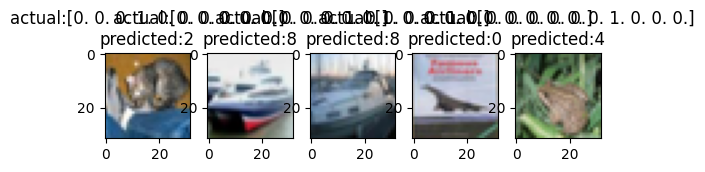

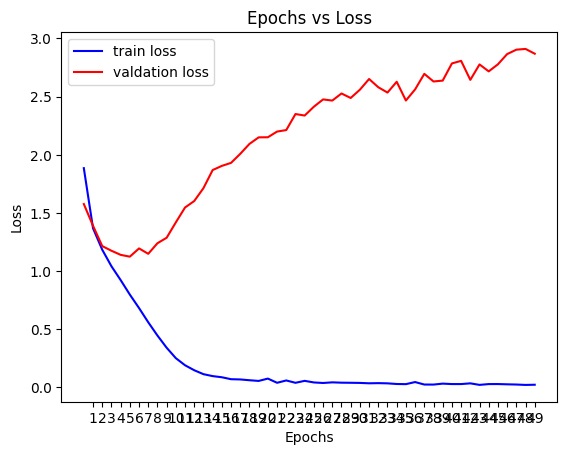

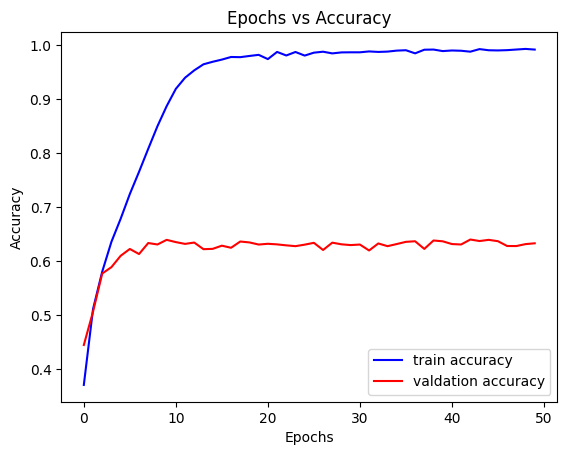

In [7]:
result=model.fit(x_train,y_train_cat,epochs=50,batch_size=64,validation_split=0.2,callbacks=[cb])
loss,test_accuracy=model.evaluate(x_test,y_test_cat)

predictions=model.predict(x_test)
predict_label=np.argmax(predictions,axis=1)
print(f"predicted label:{predict_label[1]}")

#Print the predicted image
for i in range(5):
    #print(f"actual:{y_test[i]}\npredicted:{predict_label[i]}")
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[i])
    plt.title(f"actual:{y_test_cat[i]}\npredicted:{predict_label[i]}")
plt.show()
plt.plot(result.history['loss'],label='train loss',color='blue')
plt.plot(result.history['val_loss'],label='valdation loss',color='red')
plt.xticks(np.arange(1,50))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs Loss")
plt.legend()
plt.show()

plt.plot(result.history['accuracy'],label='train accuracy',color='blue')
plt.plot(result.history['val_accuracy'],label='valdation accuracy',color='red')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Epochs vs Accuracy")
plt.legend()
plt.show()